In [25]:
#Jared St. Louis

# IMPORT LIBRARIES

In [26]:
from pandas_datareader import data, wb
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf


sns.set_style('whitegrid')
cf.go_offline()
%matplotlib inline

## Data

stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo



# Get Data

In [27]:
# stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks
yf.pdr_override()

start = dt.datetime(2006, 1, 1)  #Jan 1, 2006
end = dt.datetime(2016, 1, 1)  #Jan 1, 2016

In [28]:
#Bank of America
BAC = data.get_data_yahoo("BAC", start, end)

#Citigroup 
C = data.get_data_yahoo("C", start, end)

#Goldman Sachs
GS = data.get_data_yahoo("GS", start, end)

#JPMorgan Chase
JPM = data.get_data_yahoo("JPM", start, end)

#Morgan Stanley
MS = data.get_data_yahoo("MS", start, end)

#Wells Fargo 
WFC = data.get_data_yahoo("WFC", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
df = data.get_data_yahoo(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], start, end)

[*********************100%***********************]  6 of 6 completed


# Organize Data

In [30]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'] #list of the ticker symbols (as strings) in alphabetical order. 

In [31]:
#concatenate the bank dataframes together to a single data frame
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [32]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [33]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.695663  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.348415  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.390091  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.341484  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.362316  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.310349  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.333878  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.428028  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.463341  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.828148  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.695122  11016400  
2006-01-04   31.530001  19.466677  10870000  
2006-01-05   31.495001  19.445063  10158000  
2006-01-06   31.680000  19.559292   8403800  
2006-01-09   31.674999  19.556206   5619600  

[5 rows x 36 columns]

# EDA



### What is the max Close price for each bank's stock throughout the time period?

In [34]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [35]:
#This dataframe will contain the returns for each bank's stock.
returns = pd.DataFrame()

In [36]:
#create a columns representing return value
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


# PERFORM DATA VISUALIZATION

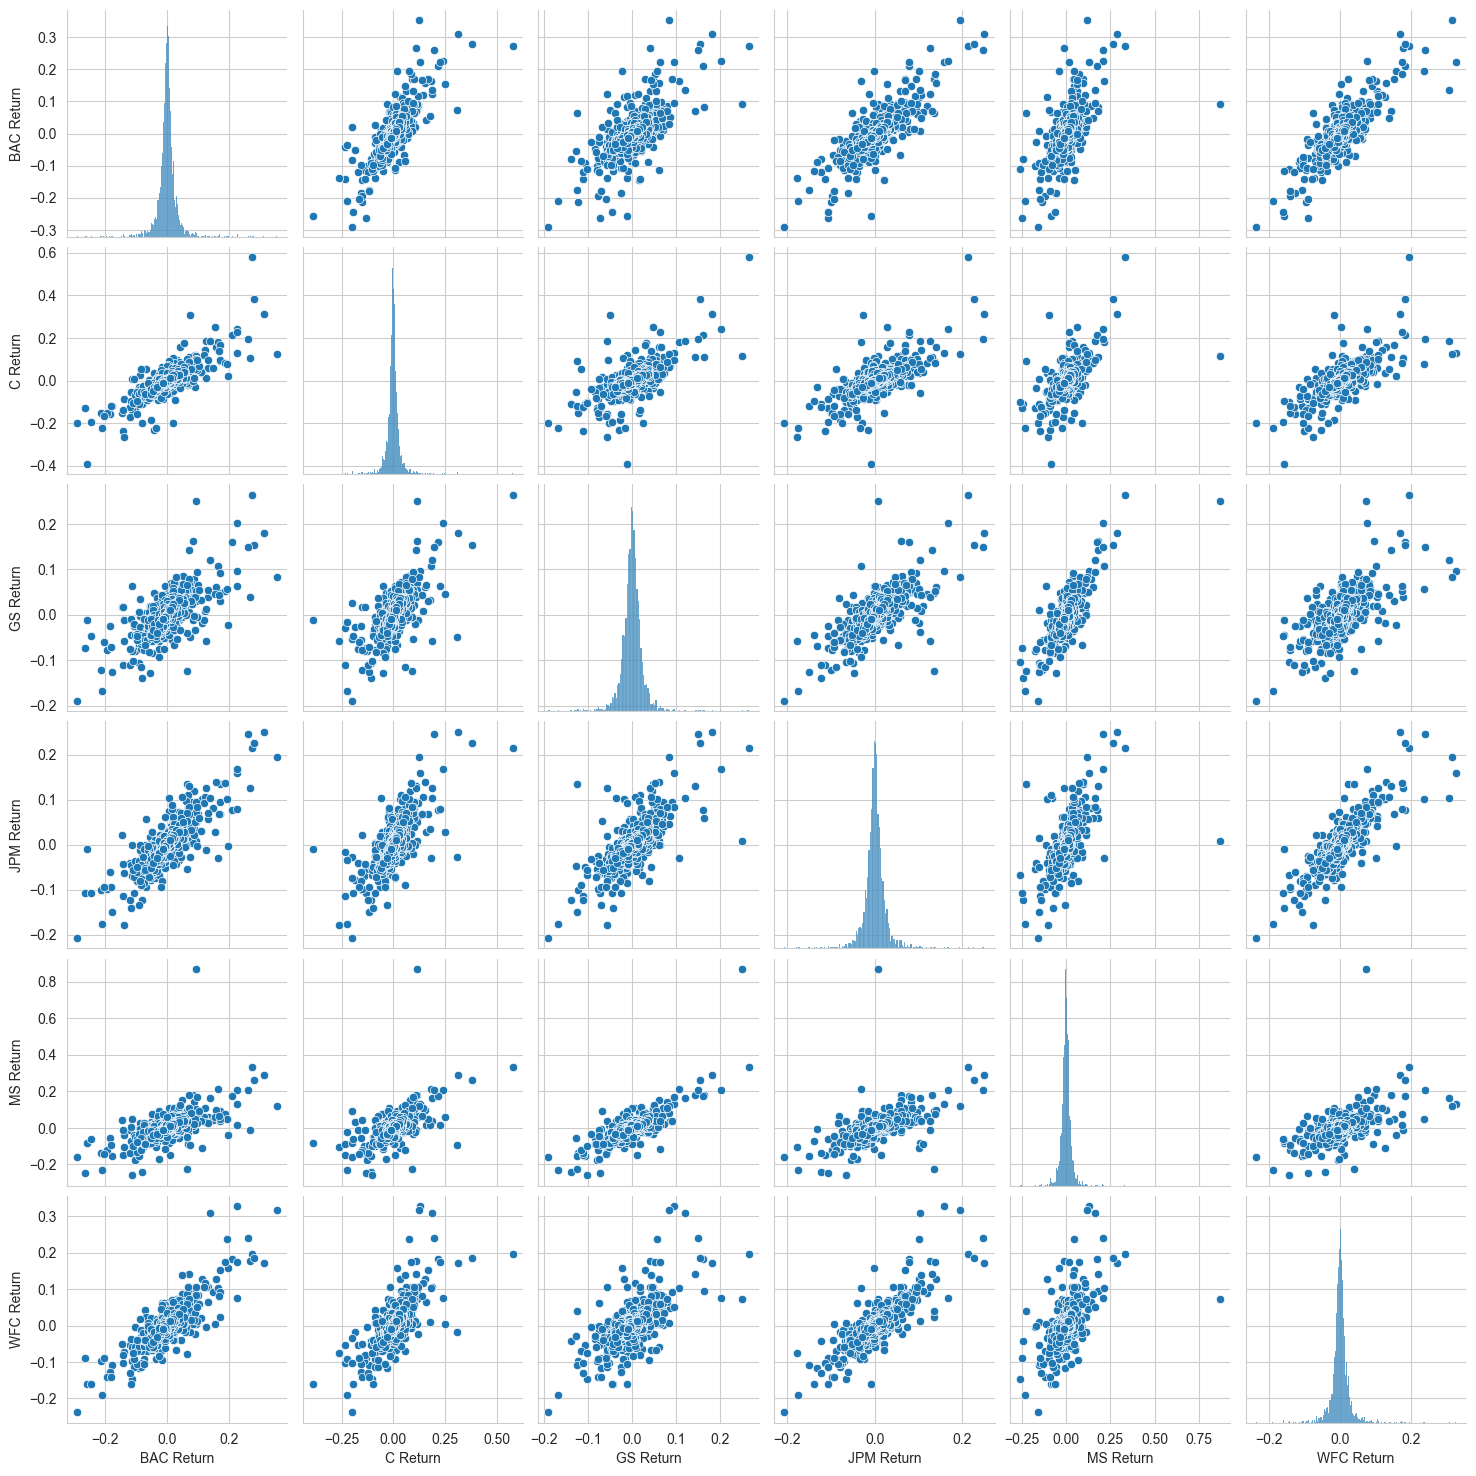

In [37]:
sns.pairplot(returns[1:])

** On what dates each bank stock had the best and worst single day returns. 

In [38]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [39]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Which stock is classified as the riskiest over the entire time period? Which is classified as the riskiest for the year 2015?**

In [40]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [41]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** distplot using seaborn of the 2015 returns for Morgan Stanley **

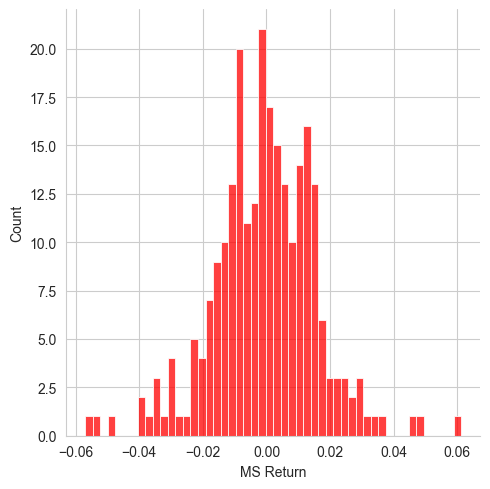

In [42]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color= 'red', bins= 50)

** distplot using seaborn of the 2008 returns for CitiGroup **

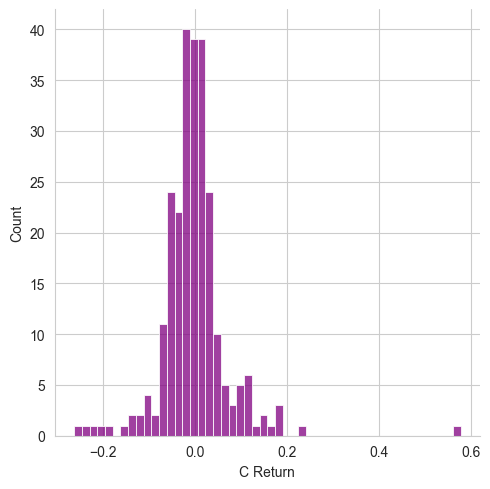

In [43]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color= 'purple', bins= 50)

** Line plot showing Close price for each bank for the entire index of time.

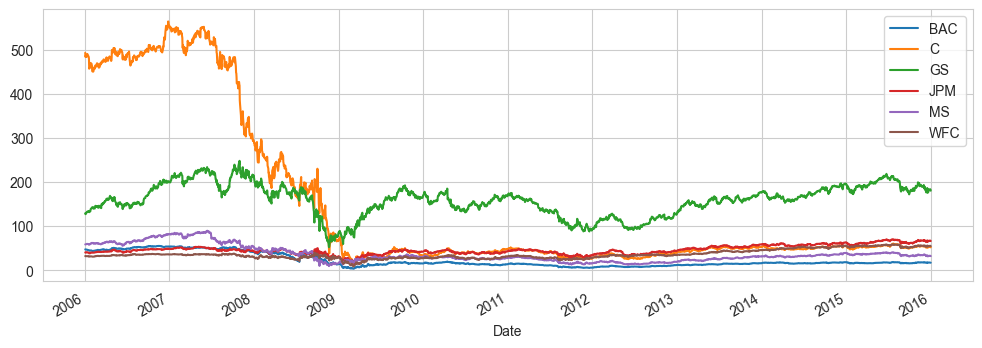

In [44]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label= tick, figsize= (12, 4))
plt.legend()

<AxesSubplot:xlabel='Date'>

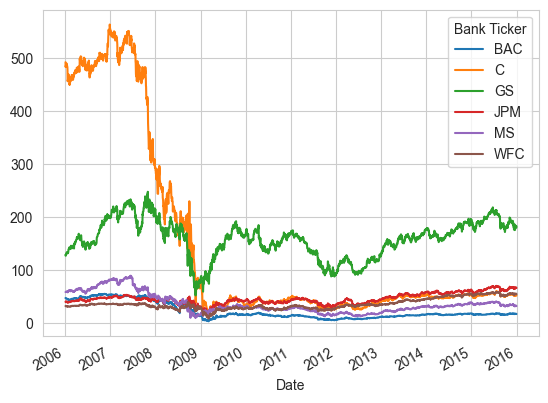

In [45]:
bank_stocks.xs(key='Close', axis=1, level= 'Stock Info').plot()

In [46]:
bank_stocks.xs(key='Close', axis=1, level= 'Stock Info').iplot()

## Moving Averages

Analyzing the moving averages for these stocks in the year 2008. 



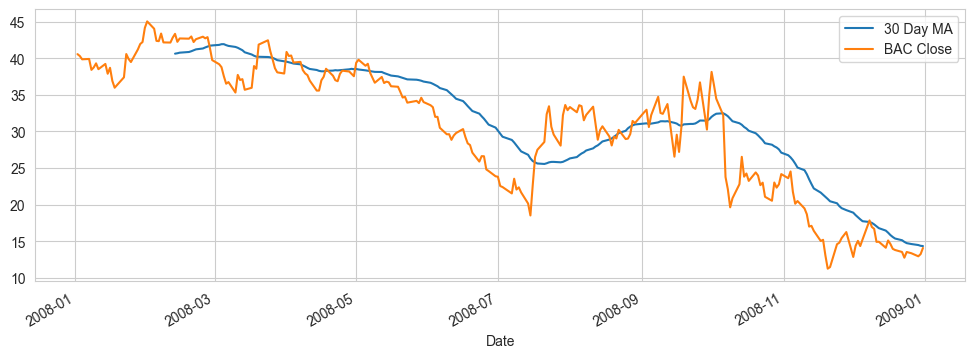

In [47]:
#Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008
plt.figure(figsize= (12, 4))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label= '30 Day MA')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label= 'BAC Close')
plt.legend()

** Heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

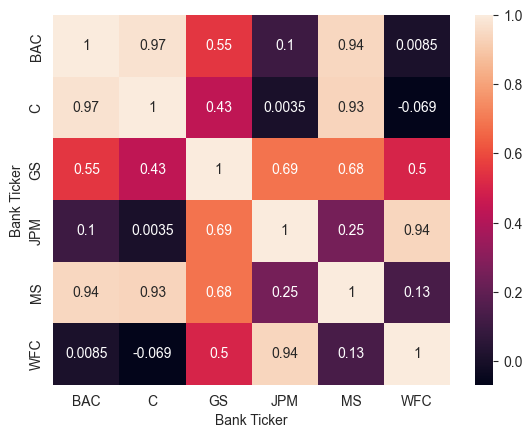

In [48]:
sns.heatmap(bank_stocks.xs('Close', level='Stock Info', axis=1).corr(), annot=True)



** Seaborn's clustermap to cluster the correlations together:**

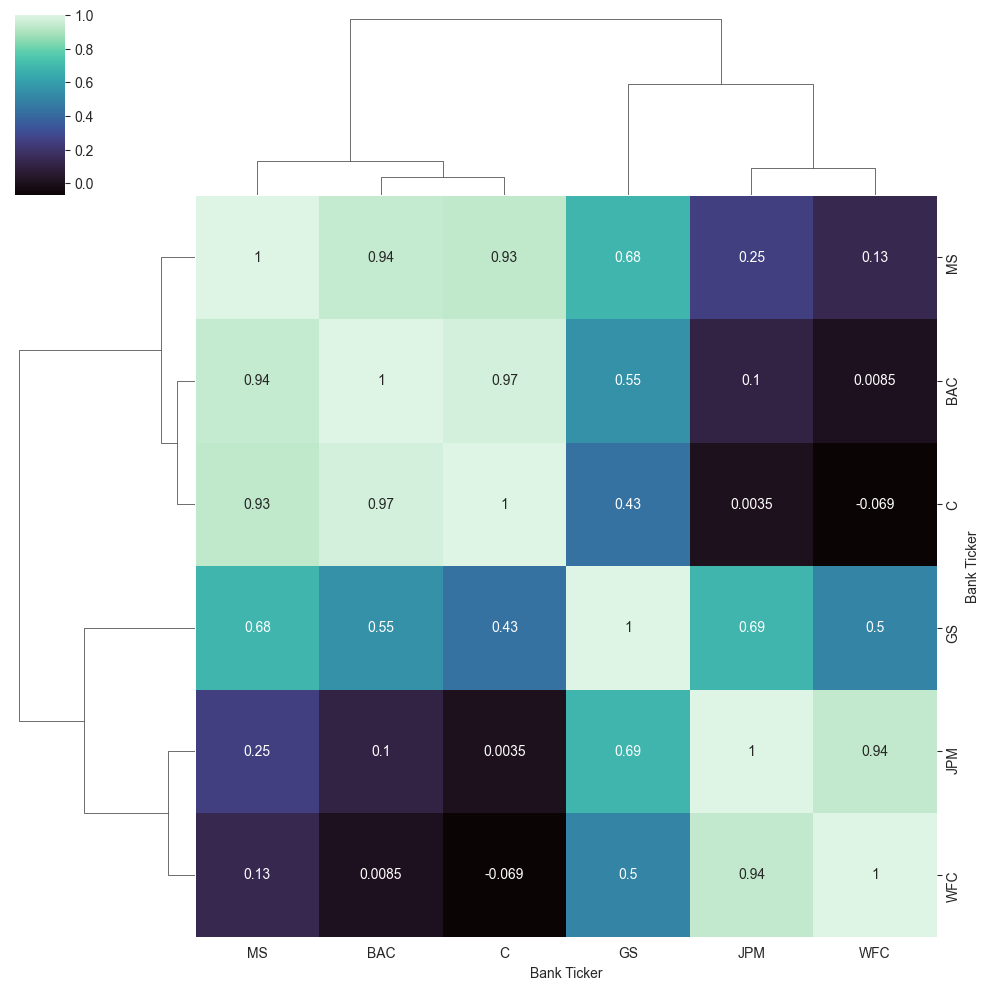

In [49]:
sns.clustermap(bank_stocks.xs('Close', level='Stock Info', axis=1).corr(), annot=True, cmap= 'mako')